- 파라미터(모델이 자체적으로 학습하는 변수)
- 하이퍼파라미터 ( 자체적으로 학습 x, 지정해야 하는 변수 )

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/drive/MyDrive/천안시 교육 2024/중급과정/머신러닝 데이터셋/creditcard.csv')

In [4]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
X = df[['V5', 'V6', 'V17', 'V19']]
Y = df['Class']

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

1. 수동 리서치

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(random_state=101).fit(X_train, Y_train)

In [9]:
predict = model.predict(X_test)

# 혼동행렬 인쇄
print(confusion_matrix(Y_test, predict))

[[56848     6]
 [   39    69]]


In [10]:
accuracy = accuracy_score(Y_test, predict)
print(accuracy)

0.9992099996488887


## 랜덤 리서치

In [11]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

In [12]:
# 하이퍼파라미터
random_search = {
    "criterion": ["entropy", 'gini'],
    "max_depth": [2],
    "max_features": ['auto', 'sqrt'],
    "min_samples_leaf": [4, 6, 8],
    "min_samples_split": [5, 7, 10],
    "n_estimators": [20]
}

In [13]:
clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator=clf,
                           param_distributions=random_search,
                           n_iter=10,
                           cv=4,
                           verbose=1,
                           random_state=101,
                           n_jobs=-1)

model.fit(X_train, Y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [5, 7, 10],
                                        'n_estimators': [20]},
                   random_state=101, verbose=1)

<Axes: xlabel='param_criterion', ylabel='param_n_estimators'>

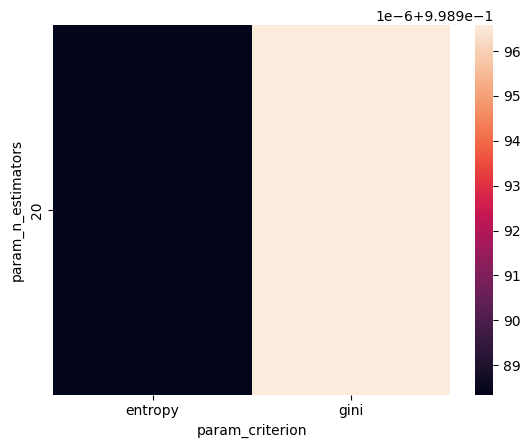

In [14]:
import seaborn as sns

table = pd.pivot_table(pd.DataFrame(model.cv_results_),
                       values='mean_test_score',
                       index='param_n_estimators',
                       columns='param_criterion')

sns.heatmap(table)

## 그리드 리서치

In [15]:
from sklearn.model_selection import GridSearchCV

grid_search = {
    "criterion": ["entropy", 'gini'],
    "max_depth": [2],
    "max_features": ['auto', 'sqrt'],
    "min_samples_leaf": [4, 6, 8],
    "min_samples_split": [5, 7, 10],
    "n_estimators": [20]
}

clf_g = RandomForestClassifier()
model = GridSearchCV(estimator=clf_g,
                    param_grid=grid_search,
                    cv=4,
                    n_jobs=-1)

model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [2],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [4, 6, 8],
                         'min_samples_split': [5, 7, 10],
                         'n_estimators': [20]})

In [16]:
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,4.671661,0.310744,0.083771,0.008710,entropy,2,auto,4,5,20,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",0.998754,0.998964,0.999105,0.998701,0.998881,0.000163,33
1,5.924391,1.395711,0.073107,0.002048,entropy,2,auto,4,7,20,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",0.999175,0.999017,0.998806,0.999140,0.999034,0.000144,16
2,5.812837,1.431037,0.077663,0.006564,entropy,2,auto,4,10,20,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",0.999122,0.999017,0.999122,0.998789,0.999012,0.000136,18
3,5.133352,0.781151,0.174759,0.102113,entropy,2,auto,6,5,20,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",0.999192,0.999017,0.998894,0.999052,0.999039,0.000106,15
4,11.186264,1.070057,0.190321,0.030835,entropy,2,auto,6,7,20,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",0.999192,0.998666,0.998543,0.999017,0.998854,0.000261,36
5,9.419129,0.639465,0.101980,0.037936,entropy,2,auto,6,10,20,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",0.998841,0.998947,0.999192,0.999052,0.999008,0.000130,19
6,10.157169,2.113656,0.154847,0.089368,entropy,2,auto,8,5,20,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",0.999052,0.999052,0.999210,0.999122,0.999109,0.000065,1
7,5.882185,1.256617,0.093981,0.035703,entropy,2,auto,8,7,20,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",0.998859,0.998596,0.999175,0.998841,0.998868,0.000206,34
8,5.655395,1.242490,0.093225,0.037165,entropy,2,auto,8,10,20,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",0.999122,0.998648,0.998806,0.999087,0.998916,0.000197,31
9,4.543200,0.321725,0.074234,0.001720,entropy,2,sqrt,4,5,20,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",0.999157,0.998754,0.999192,0.998701,0.998951,0.000225,26


In [18]:
model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=2, max_features='auto',
                       min_samples_leaf=8, min_samples_split=5,
                       n_estimators=20)

In [17]:
predict = model.best_estimator_.predict(X_test)
accuracy_grid = accuracy_score(Y_test, predict)
print(accuracy_grid)

0.9991046662687406


## 다른 데이터셋으로 한번 더!

In [19]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

# scipy == 통계, 수학적 계산 등을 쉽게 해주는 라이브러리
# 균등분포 생성 함수
from scipy.stats import uniform

In [20]:
from math import dist
iris = load_iris()

logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200, random_state=0)
distributions = dict(C=uniform(loc=0, scale=4), penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions, random_state=0)

search = clf.fit(iris.data, iris.target)
search.best_params_

{'C': 2.195254015709299, 'penalty': 'l1'}

In [21]:
print(f"Best Score : {search.best_score_}")

Best Score : 0.9800000000000001


#### 아이리스 - 그리드서치

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [23]:
parameter = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

svc = svm.SVC()

clf = GridSearchCV(svc, parameter)
clf.fit(iris.data, iris.target)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [24]:
clf.best_params_

{'C': 1, 'kernel': 'linear'}

In [25]:
clf.best_score_

0.9800000000000001